# Importing Modules

In [18]:
import torch
import torchinfo
import torchvision
import pickle

import gymnasium as gym
import matplotlib.pyplot as plt

In [19]:
import models

In [20]:
import importlib
importlib.reload(models)

<module 'models' from 'c:\\Users\\josep\\Code\\School\\RL\\Project\\src\\models\\__init__.py'>

# DQN

## Configure

In [21]:
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)


In [22]:
GRID_SEARCH = True

In [23]:
def save_model(agent, path: str):
    """Save DQN model weights"""
    with open(path, 'wb') as file:
        pickle.dump(agent, file)
    

def load_model(path: str):
    """Load DQN model weights"""
    with open(path, 'rb') as f:
        model = pickle.load(f)
    return model

## Hyperparameters search

In [24]:
if GRID_SEARCH:
    tuner = models.RayTuneDQN(num_samples=50, max_episodes=1000)

    # Run hyperparameter search
    analysis = tuner.run_hyperparameter_search()

    # Print best configuration
    best_dqn = tuner.print_best_config(analysis)

2024-12-13 02:53:55,341	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-13_02-53-49_400269_20936\artifacts\2024-12-13_02-53-55\_trainable_2024-12-13_02-53-55\driver_artifacts\_trainable_66e5b_00000_0_batch_size=128,epsilon_decay=500,epsilon_min=0.0333,epsilon_start=0.9456,gamma=0.9504,learning_rate=0.000_2024-12-13_02-53-55
2024-12-13 02:53:55,345	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-13_02-53-49_400269_20936\artifacts\2024-12-13_02-53-55\_trainable_2024-12-13_02-53-55\driver_artifacts\_trainable_66e5b_00000_0_batch_size=128,epsilon_decay=500,epsilon_min=0.0333,epsilon_start=0.9456,gamma=0.9504,learning_rate=0.000_2024-12-13_02-53-55
2024-12-13 02:53:55,351	


Best Trial Performance:
Moving Average Reward (last 100 episodes): 500.00
Stability Score: 500.00

Best Configuration:
memory_size: 10000
batch_size: 128
epsilon_start: 0.9462628805620997
epsilon_min: 0.02033778743797492
epsilon_decay: 2000
tau: 0.004703223879378638
gamma: 0.977902361072357
learning_rate: 0.00017705817858879608


In [8]:
if not GRID_SEARCH:
    best_dqn = {
        'memory_size': 10000,
        'batch_size': 128,
        'epsilon_start': 0.9462628805620997,
        'epsilon_min': 0.02033778743797492,
        'epsilon_decay': 2000,
        'tau': 0.004703223879378638,
        'gamma': 0.977902361072357,
        'learning_rate': 0.00017705817858879608}

In [9]:
print("Best trial config:", best_dqn)

Best trial config: {'memory_size': 10000, 'batch_size': 256, 'epsilon_start': 0.940239258259844, 'epsilon_min': 0.022306547083956345, 'epsilon_decay': 1000, 'tau': 0.00881078184175736, 'gamma': 0.9811697473671378, 'learning_rate': 0.0002171710406330182}


In [10]:
N_EPOCHS = 1000
MODEL_PATH = './best_model.pth'

## Train

In [11]:
env = gym.make("CartPole-v1")
env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = models.CartPoleDQNAgent(env, state_dim, action_dim, device, 
                            **best_dqn)

In [12]:
# Train the agent
tr_info = models.train_DQL(env, agent, device, int(N_EPOCHS))


100%|██████████| 1000/1000 [26:50<00:00,  1.61s/it, total_r=443]


## Save best model

In [13]:
save_model(agent, './best_dqn.pkl')

## Load best model

In [14]:
load_model('./best_dqn.pkl')

## Plot result

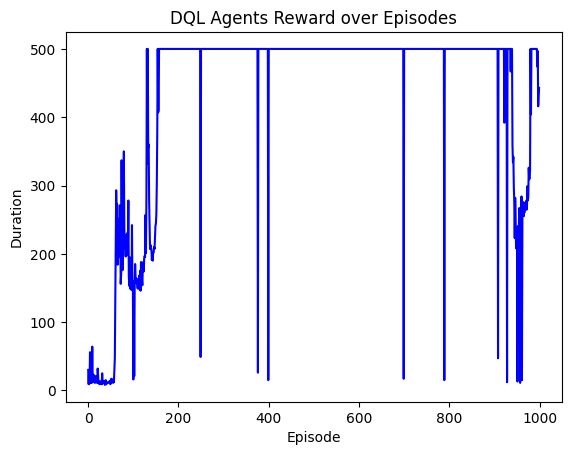

In [15]:
plt.figure(1)
plt.title('DQL Agents Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Duration')
plt.plot(tr_info['total_r'], color='b')
plt.show()

# DDQN

## Configure

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.mps.is_available() else 'cpu'

In [5]:
GRID_SEARCH = False
N_EPOCHS = 1000
MODEL_PATH = './best_model.pth'

## Hyperparameter search

In [6]:
if GRID_SEARCH:
    tuner = models.RayTuneDDQN(num_samples=50, max_episodes=1000)

    # Run hyperparameter search
    analysis = tuner.run_hyperparameter_search()


2024-12-12 22:00:51,133	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-12_22-00-45_207513_20936\artifacts\2024-12-12_22-00-51\_trainable_2024-12-12_22-00-51\driver_artifacts\_trainable_75dfa_00000_0_batch_size=32,epsilon_decay=1500,epsilon_min=0.0025,epsilon_start=0.9764,gamma=0.9769,learning_rate=0.000_2024-12-12_22-00-51
2024-12-12 22:00:51,138	WARNING trial.py:647 -- The path to the trial log directory is too long (max length: 260. Consider using `trial_dirname_creator` to shorten the path. Path: C:\Users\josep\AppData\Local\Temp\ray\session_2024-12-12_22-00-45_207513_20936\artifacts\2024-12-12_22-00-51\_trainable_2024-12-12_22-00-51\driver_artifacts\_trainable_75dfa_00000_0_batch_size=32,epsilon_decay=1500,epsilon_min=0.0025,epsilon_start=0.9764,gamma=0.9769,learning_rate=0.000_2024-12-12_22-00-51
2024-12-12 22:00:51,148	

In [7]:
if GRID_SEARCH: 
    # Print best configuration
    best_ddqn = tuner.print_best_config(analysis)


Best Trial Performance:
Moving Average Reward (last 100 episodes): 500.00
Stability Score: 500.00

Best Configuration:
memory_size: 20000
batch_size: 64
epsilon_start: 0.9550918958252147
epsilon_min: 0.0022462275686354082
epsilon_decay: 3500
tau: 0.004220863196126302
gamma: 0.9740520048831592
learning_rate: 0.00034327793534851507


In [8]:
if not GRID_SEARCH:
    best_ddqn = {
        'memory_size': 20000,
        'batch_size': 64,
        'epsilon_start': 0.9550918958252147,
        'epsilon_min': 0.0022462275686354082,
        'epsilon_decay': 3500,
        'tau': 0.004220863196126302,
        'gamma': 0.9740520048831592,
        'learning_rate': 0.00034327793534851507
        }

## Train

In [9]:
env = gym.make("CartPole-v1")
env.reset()
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

agent = models.CartPoleDDQNAgent(env, state_dim, action_dim, device, 
                            **best_ddqn)

In [10]:
# Train the agent
tr_info = models.train_DDQL(env, agent, device, N_EPOCHS)

100%|██████████| 1000/1000 [19:38<00:00,  1.18s/it, total_r=500]


## Plot

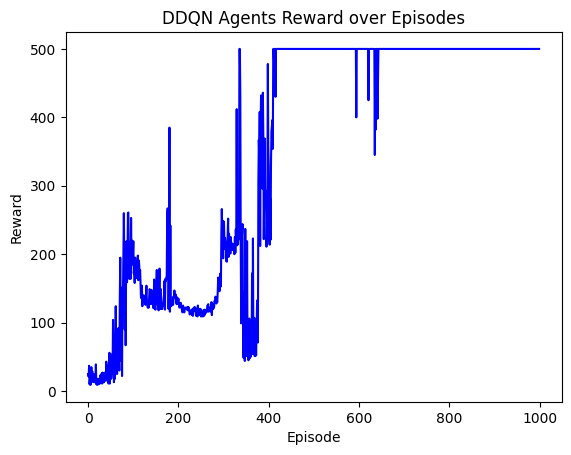

In [17]:
plt.figure(1)
plt.title('DDQN Agents Reward over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.plot(tr_info['total_r'], color='b')
plt.show()

## Save best model

In [16]:
save_model(agent, './best_ddqn.pkl')

## Load best model

In [24]:
load_model('./best_ddqn.pkl')